In [1]:
import datetime as dt
import numpy as np
import pickle
import gdal
import _pickle as cPickle
import datetime as dt

#from plot_kafka_retrieval_utils import extract_pixel, plot_pixel_tseries

import matplotlib.pylab as plt
%matplotlib inline

from henan_field_data import read_field_data
from plot_kafka_retrieval_utils import get_pixel, plot_pixel_tseries_s2

In [27]:
## !WARNING there may be some issue with this function. 

def plot_all_params(axs, params, filepaths, year, x, y, legend = None, error="shading"):
    """loop through different retrieval direcories and plot all parameters"""
    for ax, param in zip(axs, params):
        title = "{}".format(param)
        if param == "LAI":
            param = "lai"
            convertLAI = True
        else:
            convertLAI = False
        print (convertLAI)
        for i, f in enumerate(filepaths):
            data, uncs, dates, doys = get_pixel(f, year, x,y)
            plot_pixel_tseries_s2(ax, data[param], uncs[param], dates, parameter = param,
                               marker='o', convertLAI=convertLAI, error=error)
        ax.set_title(title)
        if legend !=None:
            ax.legend(legend)
    return axs

## Henan

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:220: RuntimeWarning: invalid value encountered in log
  u_unc = -2. * np.log(u_unc)


Text(0.5,1,'Henan')

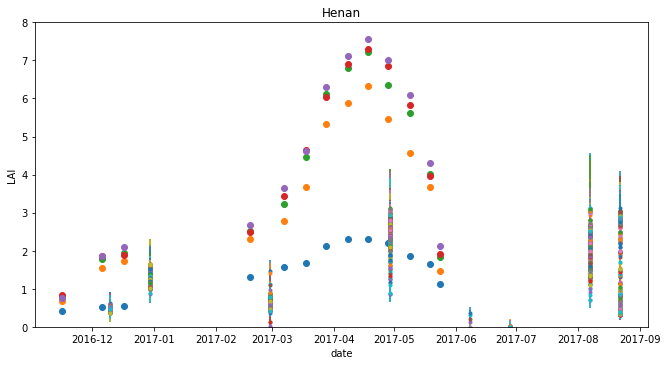

In [6]:
#HENAN
fp_henan_noprop = ("/home/npounder/output/kafka/China/kafkaout_Henan_first_pass_noprop",
                   "noProp, const prior", "bar")

fp_henan_noprop_w2 = ("/home/npounder/output/kafka/China/kafkaout_Henan_noprop_newHScalWofostPrior_unc2",
                   "no prop, wofost prior (unc = 2)", "bar")
#wofost = "/media/DataShare/Alex/wofost/henan_lai_wofost_site_s01HB.pkl"
wofost = "/home/npounder/repositories/python3/wofost_calibration/wofostPriors/henan_wofost_lai_newhengshuical.pkl"

# Plot single image retrievals for Henan site - constant prior
targetdates = np.array([#[2016,9,10],[2016,10,13],
                [2016,12,9],[2016,12,29],
                  [2017,2,27],[2017,4,28], [2017,6,7], [2017,6,27],
                  #[2017,8,6],[2017,10,20], [2017,10,30],[2017,12,19]
                ])
time_grid = [dt.datetime(y,m,d)+dt.timedelta(days=1) for [y,m,d] in targetdates]
    
parameter_list = ['n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'lai', 'ala', 'bsoil', 'psoil']
param = 'lai'
fig, axs = plt.subplots(1,1, figsize=(11,5.6))
#axs = axs.flatten()
axs = [axs]

for x in range(40,60):#(85,95):
    for y in range(45,60):#(50,60):
        data, uncs, dates, doys = get_pixel(fp_henan_noprop[0], '????',x,y, 
                                            params = parameter_list,
                                            recreate_file = False)
        plot_pixel_tseries_s2(axs[0], data[param], uncs[param], dates, parameter = param,
                           marker = '.', convertLAI = True, error='bar', 
                              line = 'None')


for site_id in range(5):
    site = read_field_data(site_id)
    # field_LAI, field_date, field_yield
    axs[0].plot(site.field_date, site.field_LAI, 'o')

axs[0].set_ylim([0,8])
#ax.set_xlim([0,366])
title = "Henan"
axs[0].set_ylabel("LAI")
axs[0].set_xlabel("date")
axs[0].set_title(title)



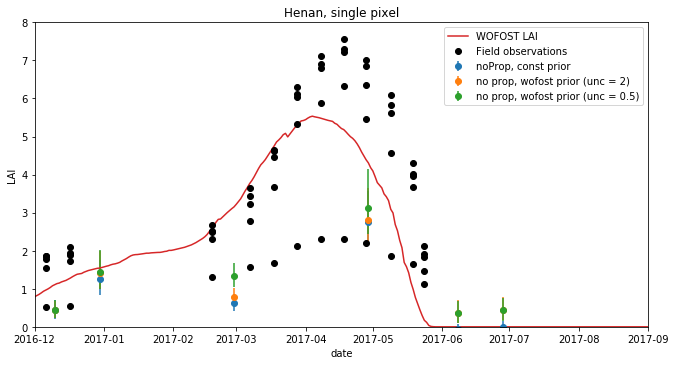

In [8]:
#HENAN
fp_henan_noprop = ("/home/npounder/output/kafka/China/kafkaout_Henan_first_pass_noprop",
                   "noProp, const prior", "bar")

fp_henan_noprop_w2 = ("/home/npounder/output/kafka/China/kafkaout_Henan_noprop_newHScalWofostPrior_unc2",
                   "no prop, wofost prior (unc = 2)", "bar")

fp_henan_noprop_w0_5 = ("/home/npounder/output/kafka/China/kafkaout_Henan_noprop_wofostPrior_unc0-5",
                   "no prop, wofost prior (unc = 0.5)", "bar")
#wofost = "/media/DataShare/Alex/wofost/henan_lai_wofost_site_s01HB.pkl"
wofost = "/home/npounder/repositories/python3/wofost_calibration/wofostPriors/henan_wofost_lai_newhengshuical.pkl"

fp_henan_paths = [fp_henan_noprop, fp_henan_noprop_w2, fp_henan_noprop_w0_5]

# Plot single image retrievals for Henan site - constant prior
targetdates = np.array([#[2016,9,10],[2016,10,13],
                [2016,12,9],[2016,12,29],
                  [2017,2,27],[2017,4,28], [2017,6,7], [2017,6,27],
                  #[2017,8,6],[2017,10,20], [2017,10,30],[2017,12,19]
                ])
time_grid = [dt.datetime(y,m,d)+dt.timedelta(days=1) for [y,m,d] in targetdates]
    
parameter_list = ['n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'lai', 'ala', 'bsoil', 'psoil']
param = 'lai'
#fig, axs = plt.subplots(2,1, figsize=(14,14))
#axs = axs.flatten()

fig, axs = plt.subplots(1,1, figsize=(11,5.6))
axs = [None,axs]
'''
for x in range(40,60):#(85,95):
    for y in range(45,60):#(50,60):
        data, uncs, dates, doys = get_pixel(fp_henan_noprop[0], '????',x,y, 
                                            params = parameter_list,
                                            recreate_file = False)
        plot_pixel_tseries_s2(axs[0], data[param], uncs[param], dates, parameter = param,
                           marker = '.', convertLAI = True, error='None', 
                              line = 'None')

axs[0].set_ylim([0,6])
#ax.set_xlim([0,366])
title = "Henan"
axs[0].set_ylabel("LAI")
axs[0].set_xlabel("date")
axs[0].set_title(title)
'''

x = 50; y=55

for path in fp_henan_paths:
# plot no propagation
    data, uncs, dates, doys = get_pixel(path[0], '????',x,y, 
                                    params = parameter_list,
                                    recreate_file = False)
    plotdates = [i for i, d in enumerate(dates) if d in time_grid]
    axs[1] = plot_pixel_tseries_s2(axs[1], data[param][plotdates], uncs[param][plotdates], 
                          np.array(dates)[plotdates], parameter = param,
                       marker = 'o', convertLAI = True, error='bar', line = 'None',
                                  label = path[1])



lai = cPickle.load(open(wofost, 'rb'), encoding='bytes')
try:
    x, y = zip(*sorted(lai.items()))
except AttributeError:
    [x, y] = lai        
axs[1].plot(x,y, label = "WOFOST LAI")

#axs[1].legend([ "WOFOST LAI", "Retrieval, prior = 4", "retrieval, prior=WOFOST (unc = 2.0)", "retrieval, prior= WOFOST (unc = 0.5)"])
axs[1].set_ylim([0,8])
#[ax.set_xlim([dt.datetime(2016,12,1), dt.datetime(2017,9,1)]) for ax in axs]
axs[1].set_xlim([dt.datetime(2016,12,1), dt.datetime(2017,9,1)])
title = "Henan, single pixel"
axs[1].set_ylabel("LAI")
axs[1].set_xlabel("date")
axs[1].set_title(title)

for site_id in range(5):           
    site = read_field_data(site_id)
    label = '_nolegend_'
    if site_id==0: label = 'Field observations'
    axs[1].plot(site.field_date, site.field_LAI, 'ko', label=label)
axs[1].legend()

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:220: RuntimeWarning: invalid value encountered in log
  u_unc = -2. * np.log(u_unc)


Text(0.5,1,'Quzhou, single pixel')

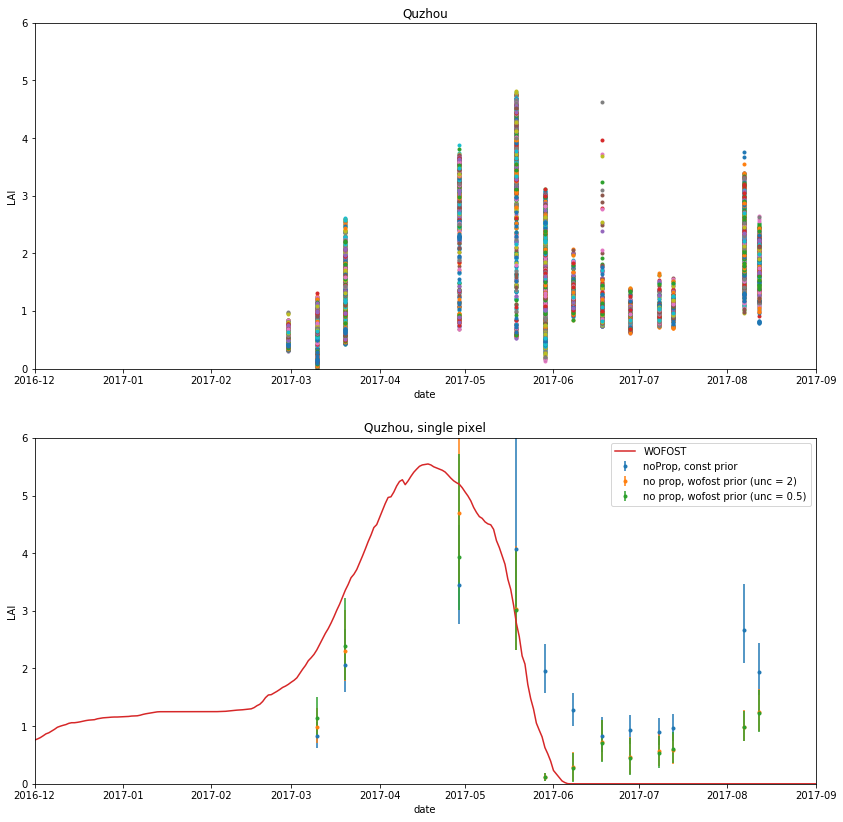

In [9]:

#Quzhou

fp_quzhou_noprop = ("/home/npounder/output/kafka/China/kafkaout_Quzhou_bigger_noprop_constPrior",
                   "noProp, const prior", "bar")

fp_quzhou_noprop_w2 = ("/home/npounder/output/kafka/China/kafkaout_Quzhou_bigger_noprop_newHScalWofostPrior_unc2",
                   "no prop, wofost prior (unc = 2)", "bar")

fp_quzhou_noprop_w0_5 = ("/home/npounder/output/kafka/China/kafkaout_Quzhou_bigger_noprop_wofostPrior_unc0-5",
                   "no prop, wofost prior (unc = 0.5)", "bar")
wofost = "/home/npounder/repositories/python3/wofost_calibration/wofostPriors/Quzhou_wofost_lai_newhengshuical.pkl"

paths = [fp_quzhou_noprop, fp_quzhou_noprop_w2, fp_quzhou_noprop_w0_5]

targetdates = np.array([[3,9],[3,19],[4,28],[5,18],[5,28],[6,7],[6,17],[6,27],[7,7],
                        [7,12],
                  [8,6],[8,11],[9,20],[10,20],[10,30],#[11, 15],
                        [11,24]])

time_grid = [dt.datetime(2017, m,d)+dt.timedelta(days=1) for [m,d] in targetdates]

                  
fig, axs = plt.subplots(2,1, figsize=(14,14))
axs = axs.flatten()


for x in range(110,160):#(85,95):
    for y in range(85,135):#(50,60):
        
        data, uncs, dates, doys = get_pixel(fp_quzhou_noprop[0], '????',x,y, 
                                            params = parameter_list,
                                            recreate_file = False)
        plot_pixel_tseries_s2(axs[0], data[param], uncs[param], dates, parameter = param,
                           marker = '.', convertLAI = True, error='None', 
                              line = 'None')

axs[0].set_ylim([0,6])
#ax.set_xlim([0,366])
title = "Quzhou"
axs[0].set_ylabel("LAI")
axs[0].set_xlabel("date")
axs[0].set_title(title)


x = 135; y=115

# plot no propagation
for path in paths:
    data, uncs, dates, doys = get_pixel(path[0], '????',x,y, 
                                        params = parameter_list,
                                        recreate_file = False)
    plotdates = [i for i, d in enumerate(dates) if d in time_grid]
    axs[1] = plot_pixel_tseries_s2(axs[1], data[param][plotdates], uncs[param][plotdates], 
                          np.array(dates)[plotdates], parameter = param,
                       marker = '.', convertLAI = True, error='bar', 
                                   line = 'None', label = path[1])




lai = cPickle.load(open(wofost, 'rb'), encoding='bytes')
try:
    x, y = zip(*sorted(lai.items()))
except AttributeError:
    [x, y] = lai        
axs[1].plot(x,y, label = "WOFOST")

axs[1].legend()#[ "WOFOST LAI", "prior = 4", "prior=WOFOST (unc= 2.0)", "prior=WOFOST (unc= 0.5)"])
axs[1].set_ylim([0,6])
[ax.set_xlim([dt.datetime(2016,12,1), dt.datetime(2017,9,1)]) for ax in axs]
title = "Quzhou, single pixel"
axs[1].set_ylabel("LAI")
axs[1].set_xlabel("date")
axs[1].set_title(title)


In [10]:
import _pickle as cPickle
targetdates = np.array([#[2016,9,10],[2016,10,13],
                [2016,12,9],[2016,12,29],
                  [2017,2,27],[2017,4,28], [2017,6,7], [2017,6,27],
                  #[2017,8,6],[2017,10,20], [2017,10,30],[2017,12,19]
])
#print (targetdates)
time_grid = [dt.datetime(y,m,d)+dt.timedelta(days=1) for [y,m,d] in targetdates]
#print(time_grid)
for d in time_grid:
    print (d in dates)
for i,d in enumerate(dates):
    if d in time_grid: print (i)
#print (dates)
indeces = [i for i, d in enumerate(dates) if d in time_grid]
print (data[param][indeces])
print (np.array(dates)[indeces])
wofost = "/media/DataShare/Alex/wofost/henan_lai_wofost_site_s01HB.pkl"
lai = cPickle.load(open(wofost, 'rb'), encoding='bytes')
x, y = zip(*sorted(lai.items()))
plt.plot(x,y)

False
False
True
True
True
True
57
117
157
177
[0.49076462 0.13982777 0.87395924 0.7997352 ]
[datetime.datetime(2017, 2, 28, 0, 0) datetime.datetime(2017, 4, 29, 0, 0)
 datetime.datetime(2017, 6, 8, 0, 0) datetime.datetime(2017, 6, 28, 0, 0)]


FileNotFoundError: [Errno 2] No such file or directory: '/media/DataShare/Alex/wofost/henan_lai_wofost_site_s01HB.pkl'

[('/home/npounder/output/kafka/China/kafkaout_Henan_Q0-0001_trajfromprior', 'Q0.0001, traj from prior', 'bar'), ('/home/npounder/output/kafka/China/kafkaout_Henan_Q0-01_trajfromprior', 'Q0.01, traj from prior', 'bar'), ('/home/npounder/output/kafka/China/kafkaout_Henan_Q1_trajfromprior', 'Q1, traj from prior', 'bar'), ('/home/npounder/output/kafka/China/kafkaout_Henan_Q100_trajfromprior', 'Q100, traj from prior', 'bar'), ('/home/npounder/output/kafka/China/kafkaout_Henan_Q10000_trajfromprior', 'Q10000, traj from prior', 'bar')]


/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:218: RuntimeWarning: invalid value encountered in log
  data = -2 * np.log(data)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:219: RuntimeWarning: invalid value encountered in log
  l_unc = -2. * np.log(l_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:220: RuntimeWarning: invalid value encountered in log
  u_unc = -2. * np.log(u_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:223: RuntimeWarning: invalid value encountered in greater
  maskprior = np.where(abs(data - 4.0) > 0.0000001)


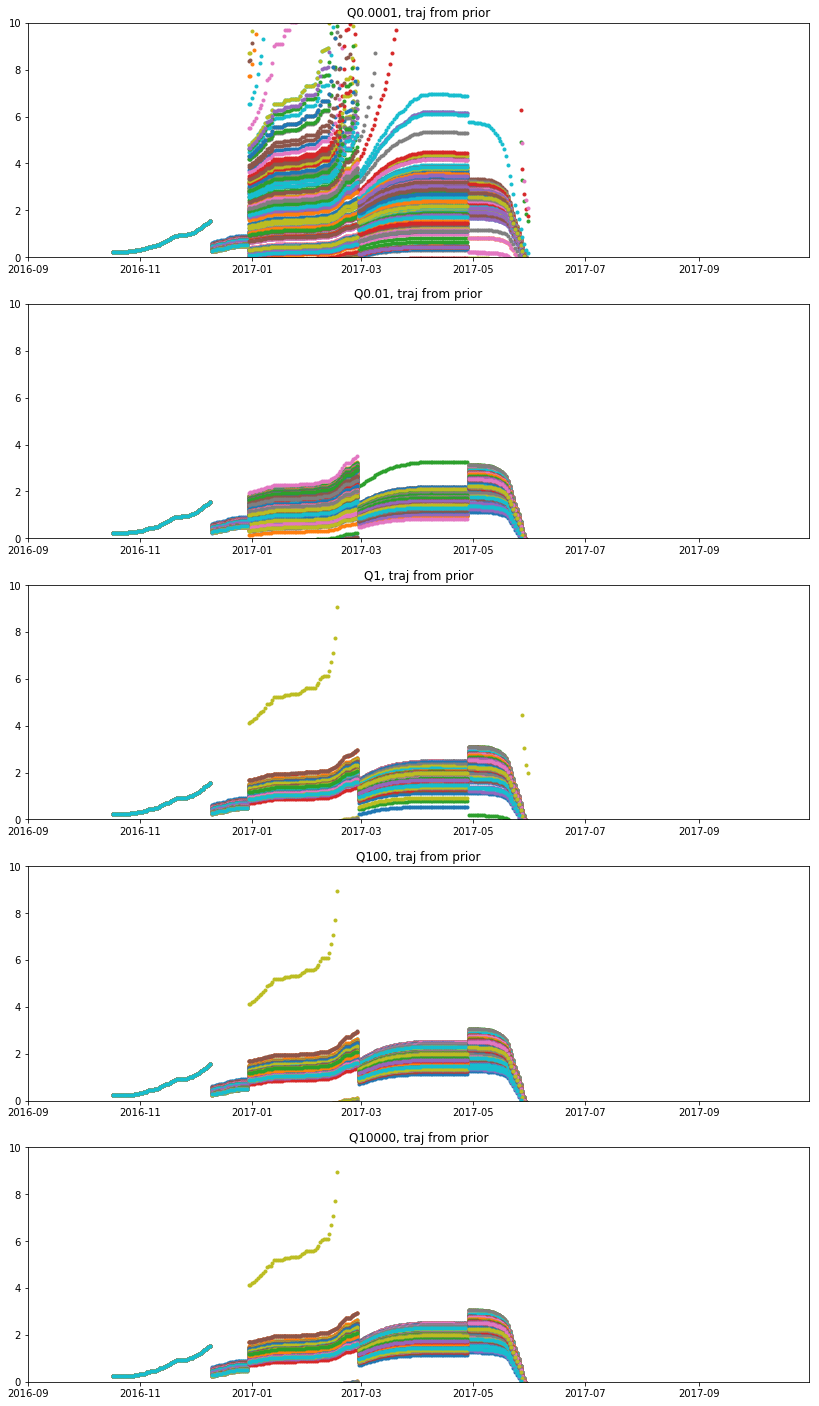

In [11]:
#fp_test= "/home/npounder/output/kafka/temporal_propagation/kafkaout_test_Quzhou_S2_temporalprior"


fp_henan_noprop = ("/home/npounder/output/kafka/China/kafkaout_Henan_first_pass_noprop",
                   "noProp, const prior", "bar")
fp_henan_Q01_w2 = ("/home/npounder/output/kafka/China/kafkaout_Henan_prop_wofostPrior_+unc2_Q0-01",
                   "Q0.01, wofost prior (unc = 2)", "shading")
fp_henan_Q0_w2 = ("/home/npounder/output/kafka/China/kafkaout_Henan_prop_wofostPrior_unc2_Q0",
                   "Q0, wofost prior (unc = 2)", "shading")
fp_henan_Q01_w4 = ("/home/npounder/output/kafka/China/kafkaout_Henan_prop_wofostPrior_unc4_Q0-01",
                   "Q0.01, wofost prior (unc = 4)", "shading")
fp_henan_noprop_w2 = ("/home/npounder/output/kafka/China/kafkaout_Henan_noprop_wofostPrior_unc2",
                   "no prop, wofost prior (unc = 2)", "bar")

fp_henan_Q0_01_wHenanCal = ("/home/npounder/output/kafka/China/kafkaout_Henan_prop_wofostCalPrior_Q0-01",
                   "Q0.01, wofost prior (henan calibration)", "bar")
fp_henan_Q0_1_wHenanCal = ("/home/npounder/output/kafka/China/kafkaout_Henan_prop_wofostCalPrior_Q0-1",
                   "Q0.1, wofost prior (henan calibration)", "bar")
fp_henan_noprop_wHenanCal = ("/home/npounder/output/kafka/China/kafkaout_Henan_noprop_wofostCalPrior",
                   "noprop, wofost prior (henan calibration)", "bar")

fp_henan_Q0_01_constprior = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q0-01_P4",
                   "Q0.01, const prior", "bar")
fp_henan_Q0_01_constprior_5day = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q0-01_P4_5day",
                   "Q0.01, const prior", "bar")
fp_henan_Q0_01_constprior_20day = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q0-01_P4_20day",
                   "Q0.01, const prior", "bar")


fp_henan_Q10000_priortraj = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q10000_trajfromprior",
                   "Q10000, traj from prior", "bar")
fp_henan_Q100_priortraj = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q100_trajfromprior",
                   "Q100, traj from prior", "bar")
fp_henan_Q1_priortraj = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q1_trajfromprior",
                   "Q1, traj from prior", "bar")
fp_henan_Q0_1_priortraj = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q0-1_trajfromprior",
                   "Q0.1, traj from prior", "bar")
fp_henan_Q0_01_priortraj = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q0-01_trajfromprior",
                   "Q0.01, traj from prior", "bar")
fp_henan_Q0_001_priortraj = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q0-001_trajfromprior",
                   "Q0.001, traj from prior", "bar")
fp_henan_Q0_0001_priortraj = ("/home/npounder/output/kafka/China/kafkaout_Henan_Q0-0001_trajfromprior",
                   "Q0.0001, traj from prior", "bar")

filepaths = [fp_henan_noprop, fp_henan_noprop_w2, fp_henan_Q01_w2, 
             fp_henan_Q0_w2, fp_henan_Q01_w4]
filepaths = [fp_henan_noprop, fp_henan_noprop_wHenanCal, 
             fp_henan_Q0_01_wHenanCal, fp_henan_Q0_1_wHenanCal]
filepaths = [fp_henan_Q0_01_constprior, fp_henan_Q0_01_constprior_5day, 
             fp_henan_Q0_01_constprior_20day, fp_henan_noprop]
filepaths = [fp_henan_Q0_0001_priortraj, fp_henan_Q0_01_priortraj, fp_henan_Q1_priortraj, 
             fp_henan_Q100_priortraj, fp_henan_Q10000_priortraj]
print(filepaths)

parameter_list = ['n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'lai', 'ala', 'bsoil', 'psoil']
param = "lai"

fig, axs = plt.subplots(5,1, figsize=(14,25))
axs = axs.flatten()
#axs = [axs]
#Plot two of the pixels with error bars
#x = 45; y = 55
#data, uncs, dates, doys = get_pixel(filepaths[0][0], '????',x,y, params = parameter_list,
#                                    recreate_file = False)
#plot_pixel_tseries_s2(axs[0], data[param], uncs[param], dates, parameter = param,
#                               marker = 'x', convertLAI = True, error="bar", line = 'None')
#x = 40; y = 4
#data, uncs, dates, doys = get_pixel(filepaths[0][0], '????',x,y, params = parameter_list,
#                                    recreate_file = False)
#plot_pixel_tseries_s2(axs[0], data[param], uncs[param], dates, parameter = param,
#                               marker = 'x', convertLAI = True, error="bar", line = 'None')
for ax, path in zip(axs, filepaths):
    for x in range(40,60):#(85,95):
        for y in range(45,60):#(50,60):
            data, uncs, dates, doys = get_pixel(path[0], '????',x,y, params = parameter_list,
                                                recreate_file = False)
            plot_pixel_tseries_s2(ax, data[param], uncs[param], dates, parameter = param,
                               marker = '.', convertLAI = True, error=None,#path[2],
                                  line = 'None')
    ax.set_ylim([0,10])
    ax.set_xlim([dt.datetime(2016,9,1),dt.datetime(2017,10,31)])
    ax.set_title(path[1])

## Quzhou

[('/home/npounder/output/kafka/China/kafkaout_QuzhouWheatSTB_noprop_wofost', 'noProp, const prior')]


/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:220: RuntimeWarning: invalid value encountered in log
  u_unc = -2. * np.log(u_unc)


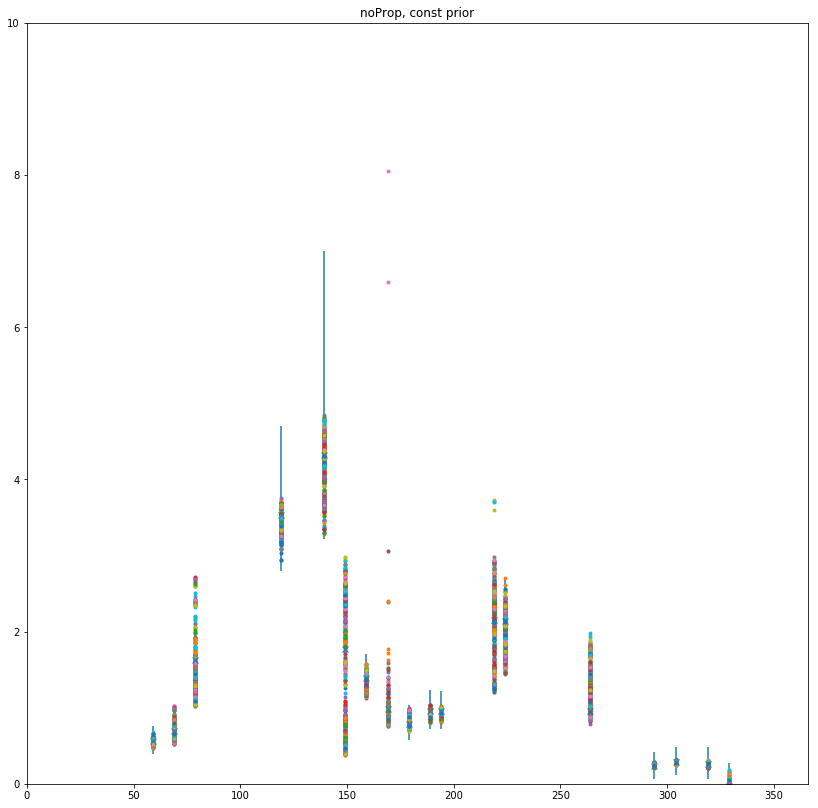

In [12]:
#fp_test= "/home/npounder/output/kafka/temporal_propagation/kafkaout_test_Quzhou_S2_temporalprior"

fp_test2 = ("/home/npounder/output/kafka/validation/S2/kafkaout_test_alex_version",
            "no prop, const prior")

fp_Q01 =  ("/home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_Q0-1_nprior",
           "prop 0.2, no prior")
fp_Q05 =  ("/home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_Q0-05_nprior",
           "prop 0.05, no prior")
fp_Q025 = ("/home/npounder/output/kafka/validation/S2/kafkaout_Quzhou_S2_Q0-025_nprior",
           "prop 0.025, no prior")
fp_W = ("/home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_WOFOST_prior/",
        "no prop, WOFOST prior")
fp_WQ025 = ("/home/npounder/output/kafka/temporal/kafkaout_Quzhou_Q0-025_S2_WOFOST_prior/",
            "prop 0.025, WOFOST prior")

fp_quzhou_wheat = ("/home/npounder/output/kafka/China/kafkaout_QuzhouWheatSTB_noprop_wofost",
                   "noProp, const prior")


filepaths = [fp_test2, fp_Q01, fp_Q05, fp_Q025, fp_W, fp_WQ025]
filepaths = [fp_quzhou_wheat]
print(filepaths)
parameter_list = ['n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'lai', 'ala', 'bsoil', 'psoil']
param = "lai"
fig, axs = plt.subplots(1,1, figsize=(14,14))
#axs = axs.flatten()
axs = [axs]
x = 30; y = 45
data, uncs, dates, doys = get_pixel(filepaths[0][0], '????',x,y, params = parameter_list,
                                    recreate_file = False)
plot_pixel_tseries_s2(axs[0], data[param], uncs[param], doys, parameter = param,
                               marker = 'x', convertLAI = True, error="bar", line = 'None')

for ax, path in zip(axs, filepaths):
    for x in range(20,40):#(85,95):
        for y in range(35,55):#(50,60):
            data, uncs, dates, doys = get_pixel(path[0], '????',x,y, params = parameter_list, recreate_file = False)

            #print(doys)
            plot_pixel_tseries_s2(ax, data[param], uncs[param], doys, parameter = param,
                               marker = '.', convertLAI = True, error=None, line = 'None')
    ax.set_ylim([0,10])
    ax.set_xlim([0,366])
    ax.set_title(path[1])

## Hengshui

Plot field data, WOFOST and S2 only retrieval

/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:218: RuntimeWarning: invalid value encountered in log
  data = -2 * np.log(data)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:220: RuntimeWarning: invalid value encountered in log
  u_unc = -2. * np.log(u_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:223: RuntimeWarning: invalid value encountered in greater
  maskprior = np.where(abs(data - 4.0) > 0.0000001)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:220: RuntimeWarning: divide by zero encountered in log
  u_unc = -2. * np.log(u_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:219: RuntimeWarning: invalid value encountered in log
  l_unc = -2. * np.log(l_unc)


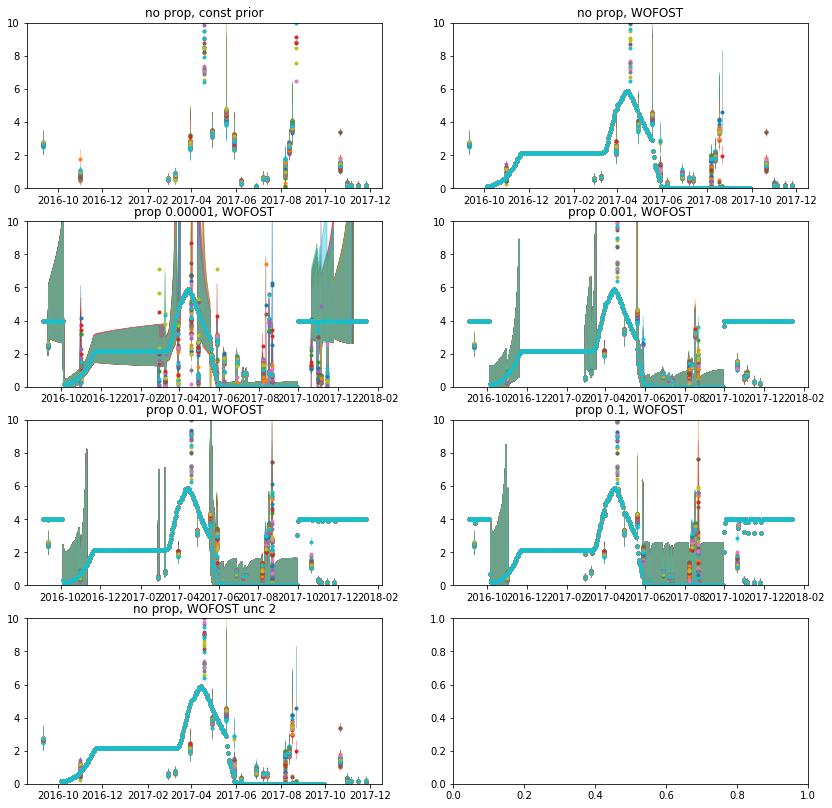

In [13]:
#fp_test= "/home/npounder/output/kafka/temporal_propagation/kafkaout_test_Quzhou_S2_temporalprior"

fp_noprop = ("/home/npounder/output/kafka/China/kafkaout_HS01_noprop", "no prop, const prior")

fp_W =  ("/home/npounder/output/kafka/China/kafkaout_HS01_noprop_wofost", "no prop, WOFOST")
fp_WQ00001 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-00001_wofost", "prop 0.00001, WOFOST")
fp_WQ001 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-001_wofost", "prop 0.001, WOFOST")
fp_WQ005 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-005_wofost", "prop 0.005, WOFOST")
fp_WQ01 = ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-01_wofost", "prop 0.01, WOFOST")
fp_WQ025 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-025_wofost", "prop 0.025, WOFOST")
fp_WQ05 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-05_wofost", "prop 0.05, WOFOST")
fp_WQ1 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-1_wofost", "prop 0.1, WOFOST")
fp_Wu2 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_noprop_wofost_unc2", "no prop, WOFOST unc 2")
filepaths = [fp_noprop, fp_W, fp_WQ00001, fp_WQ001, fp_WQ01, fp_WQ1, fp_Wu2]

x = 25; y = 25

parameter_list = ['n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'lai', 'ala', 'bsoil', 'psoil']
param = "lai"

fig, axs = plt.subplots(4,2, figsize=(14,14))
for ax, path in zip(axs.flatten(), filepaths):
    for x in range(20,30):
        for y in range (20,30):
            data, uncs, dates, doys = get_pixel(path[0],'????',x,y, params = parameter_list, recreate_file = False)

            #print(data.keys())
            plot_pixel_tseries_s2(ax, data[param], uncs[param], dates, parameter = param,
                               marker = '.', convertLAI = True, error='shading', line = 'None')
    ax.set_ylim([0,10])
    #ax.set_xlim([0,366])
    #ax.set_xlim([275,320])
    ax.set_title(path[1])


In [14]:
sigma = 2
def transform_x(x):
    return np.exp(-0.5*x)



In [15]:
HS01_20170329 = [1.75,1.51, 1.42, 2.22, 1.35, 0.94, 1.5, 1.02, 1.72,
                 1.1, 1.53, 0.84, 1.31, 1.67, 1.14, 1.15, 1.5, 1.37,
                 1.02, 1.11, 1.64, 1.54, 1.95, 1.94, 0.98]
HS02_20170329 = [1.79, 0.7, 1.59, 1.19, 1.25, 0.67, 0.85, 0.86, 1.56,
                 0.86, 4.52, 1.17, 1.5, 1.99, 1.27, 1.78, 0.95, 0.82,
                 0.61, 1, 1.34, 1.16, 1.05, 1.6, 2.01, 1.36]

HS01_20170504 = [4.02, 4.89, 3.21, 2.99, 5, 5.44, 5.77, 4.91, 5.72,
                 6.1, 3.98, 4.97, 5.1, 4.27, 4.35, 6.23, 6.52, 5.46,
                 5.17, 4.41, 5.06, 5.81, 6.01, 5.49, 6.43]

HS02_20170504 = [5.2, 3.86, 3.71, 3.87, 6.29, 4.39, 4.92, 4.63, 4.49,
                 6.38, 5.14, 3.67, 4.92, 6.09, 5.42, 4.88, 6.01, 5.47,
                 2.89, 3.44, 5.57, 4.98, 5.82, 2.89, 3.33]

HS01 = {dt.date(2017,3,29) : HS01_20170329, dt.date(2017,5,4) : HS01_20170504}
HS02 = {dt.date(2017,3,29) : HS02_20170329, dt.date(2017,5,4) : HS02_20170504}

HS01_Maize_20170705 = [0.749,
0.17]


HS02_Maize_20170705 = [0.65,
0.13,
0.73,
1.09,
0.7,
0.69]

                       
HS03_Maize_20170705 = [0.64,
1.02,
0.35,
1.14,
0.89,
1.14,
0.89,
0.79,
1.25,
1.14,
0.6,
1.27,
1.7,
1.93]



/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:218: RuntimeWarning: invalid value encountered in log
  data = -2 * np.log(data)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:220: RuntimeWarning: invalid value encountered in log
  u_unc = -2. * np.log(u_unc)
/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:223: RuntimeWarning: invalid value encountered in greater
  maskprior = np.where(abs(data - 4.0) > 0.0000001)


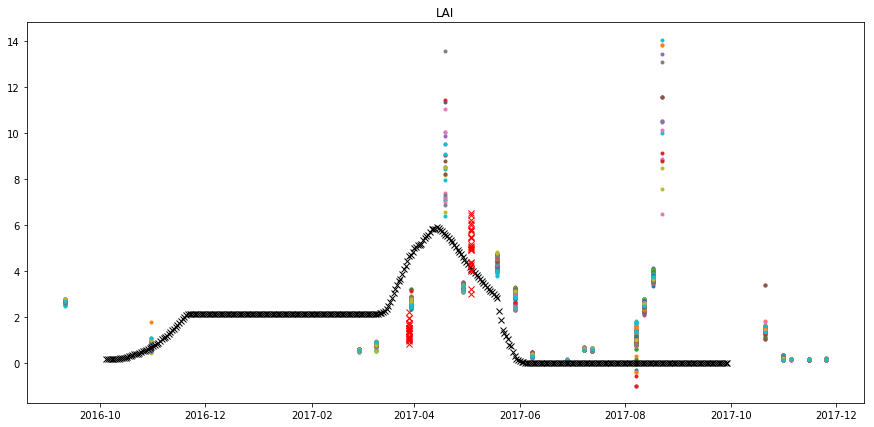

In [17]:
fig, ax = plt.subplots(1,1, figsize=(15,7))

fp_noprop = ("/home/npounder/output/kafka/China/kafkaout_HS01_noprop", "no prop, const prior")
parameter_list = ['n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'lai', 'ala', 'bsoil', 'psoil']
param = "lai"
for x in range(20,30):
    for y in range (20,30):
        data, uncs, dates, doys = get_pixel(fp_noprop[0],'????',x,y, params = parameter_list, recreate_file = False)

        #print(data.keys())
        plot_pixel_tseries_s2(ax, data[param], uncs[param], dates, parameter = param,
                           marker = '.', convertLAI = True, error='None', line = 'None')

        
        
laiprior = "/media/DataShare/Nicola/NplusIntegration/hengshui_lai_wofost.pkl"
lai = pickle.load(open(laiprior, 'rb'), encoding='bytes')
#lai = {dt.date(key.year, key.month, key.day): np.exp(-val / 2.) for key, val in lai.items()}
im = ax.plot(lai.keys(), lai.values(), 'kx')

im = ax.plot(HS01.keys(), HS01.values(), 'rx')

Text(0.5,1,'no prop, WOFOST - no prop, const prior')

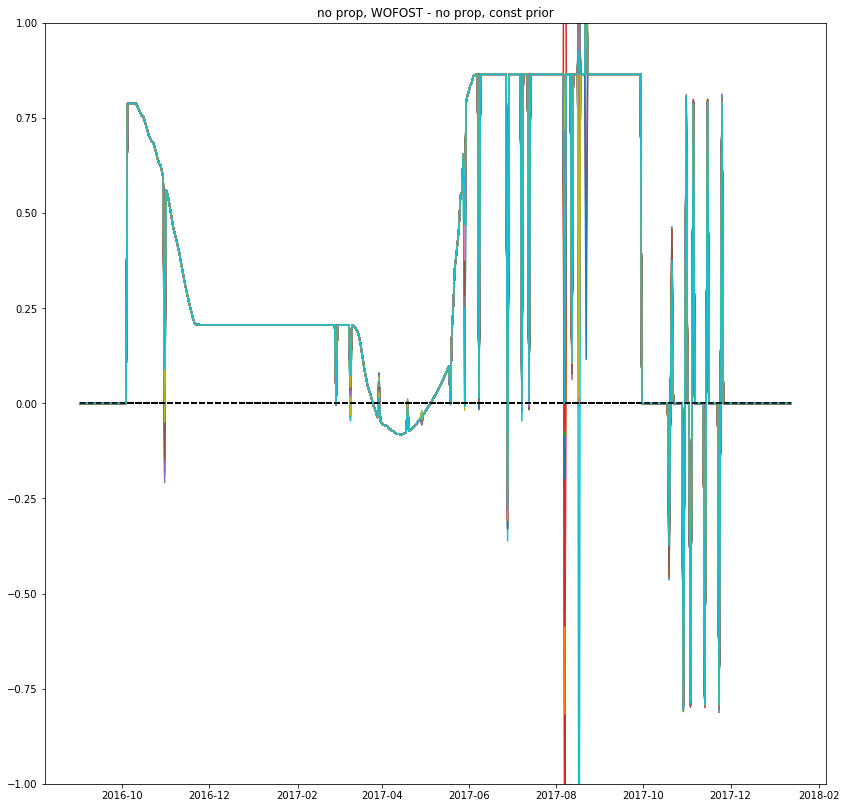

In [18]:
# Plot residuals #fp_test= "/home/npounder/output/kafka/temporal_propagation/kafkaout_test_Quzhou_S2_temporalprior"

fp_noprop = ("/home/npounder/output/kafka/China/kafkaout_HS01_noprop", "no prop, const prior")

fp_W =  ("/home/npounder/output/kafka/China/kafkaout_HS01_noprop_wofost", "no prop, WOFOST")
fp_WQ00001 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-00001_wofost", "prop 0.00001, WOFOST")
fp_WQ001 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-001_wofost", "prop 0.001, WOFOST")
fp_WQ005 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-005_wofost", "prop 0.005, WOFOST")
fp_WQ01 = ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-01_wofost", "prop 0.01, WOFOST")
fp_WQ025 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-025_wofost", "prop 0.025, WOFOST")
fp_WQ05 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-05_wofost", "prop 0.05, WOFOST")
fp_WQ1 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_Q0-1_wofost", "prop 0.1, WOFOST")
fp_Wu2 =  ("/home/npounder/output/kafka/China/kafkaout_HS01_noprop_wofost_unc2", "no prop, WOFOST unc 2")
#filepaths = [fp_noprop, fp_W, fp_WQ00001, fp_WQ001, fp_WQ01, fp_WQ1, fp_Wu2]

filepaths = [fp_W, fp_noprop]

#x = 25; y = 25

parameter_list = ['n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'lai', 'ala', 'bsoil', 'psoil']
param = "lai"

#fig, axs = plt.subplots(4,2, figsize=(14,14))
#for ax, path in zip(axs.flatten(), filepaths):
fig, ax = plt.subplots(1,1, figsize=(14,14))
for x in range(20,30):
    for y in range (20,30):
        data, uncs, dates, doys = get_pixel(filepaths[0][0],'????',x,y, params = parameter_list, recreate_file = False)
        data2, uncs2, dates2, doys2 = get_pixel(filepaths[1][0],'????',x,y, params = parameter_list, recreate_file = False)
        overlap1 = [i for i, d in enumerate(dates2) if d in dates]
        #print(overlap)
        overlap2 = [i for i, d in enumerate(dates) if d in dates2]
        #print(list(zip(overlap1, overlap2)))
        #print(dates, dates2)
        #print(data.keys())
        plotdata = [data[param][i1]-data2[param][i2] for i1, i2 in zip(overlap1, overlap2)]
        #print(plotdata)
        plotdates = [dates[i] for i in overlap1]
        #plot_pixel_tseries_s2(ax, plotdata, uncs[param],
        #                     plotdates, parameter = param,
        #                    marker = '.', convertLAI = True, error='None', line = 'None')
        ax.plot(plotdates,plotdata)
        ax.plot(plotdates,np.zeros_like(plotdata), 'k--')
ax.set_ylim([-1,1])
#ax.set_xlim([0,366])
#ax.set_xlim([275,320])
ax.set_title(filepaths[0][1]+' - '+filepaths[1][1])


In [19]:
# These [parameters may be used for any narrowband SAIL retrieval]
#params=["LAI","TeLAI", "w_nir", "x_nir", "a_nir",
#        "w_vis", "x_vis", "a_vis"]
params = ['LAI', 'lai', 'n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'ala', 'bsoil', 'psoil']

## Quzhou

True
creating /home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_Q0-05_nprior/pixel_91_56.pkl
saving output to /home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_Q0-05_nprior/pixel_91_56.pkl


/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:220: RuntimeWarning: invalid value encountered in log
  u_unc = -2. * np.log(u_unc)


True
creating /home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_WOFOST_prior//pixel_91_56.pkl
saving output to /home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_WOFOST_prior//pixel_91_56.pkl


/home/npounder/repositories/kafkatests/plot_kafka_retrieval_utils.py:220: RuntimeWarning: divide by zero encountered in log
  u_unc = -2. * np.log(u_unc)


creating /home/npounder/output/kafka/temporal/kafkaout_Quzhou_Q0-025_S2_WOFOST_prior//pixel_91_56.pkl
saving output to /home/npounder/output/kafka/temporal/kafkaout_Quzhou_Q0-025_S2_WOFOST_prior//pixel_91_56.pkl


Text(0.5,1,'LAI with WOFOST prior with or without propagation')

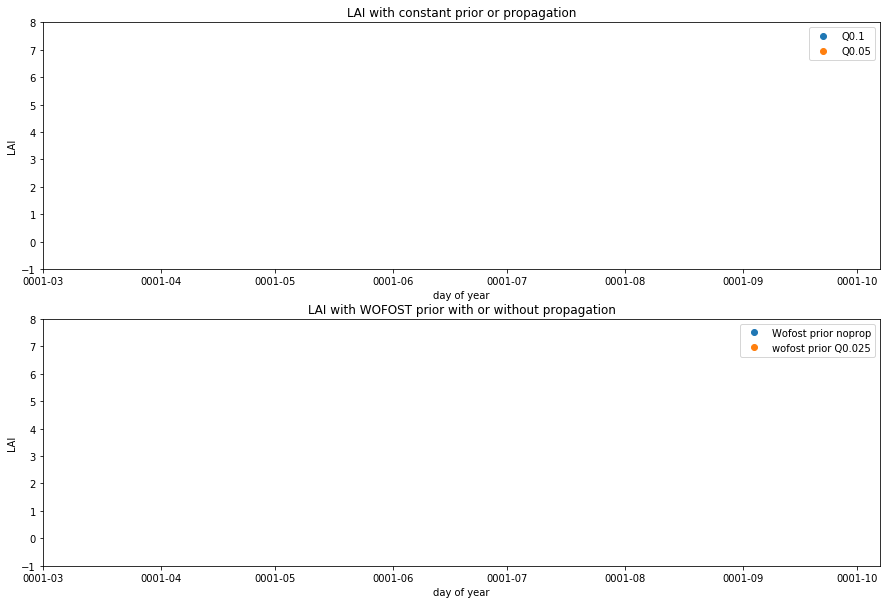

In [28]:
params = ['LAI']

filepaths = [
             [#"/home/npounder/output/kafka/validation/S2/kafkaout_test_alex_version",
              "/home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_Q0-1_nprior",
             "/home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_Q0-05_nprior"],
             #"/home/npounder/output/kafka/validation/S2/kafkaout_Quzhou_S2_Q0-025_nprior"],
            ["/home/npounder/output/kafka/temporal/kafkaout_Quzhou_S2_WOFOST_prior/",
            "/home/npounder/output/kafka/temporal/kafkaout_Quzhou_Q0-025_S2_WOFOST_prior/"]
        ]
legends = [("Q0.1", "Q0.05"),#, "Q0.025"),
            ("Wofost prior noprop", "wofost prior Q0.025")]


x = 91; y= 56

#filepaths = [#"/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_newmask_0-05",
#            #"/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_newmask_NoProp",
#             "/home/npounder/output/planet/kafkaout_planet_0-025_1pd",
#             "/home/npounder/output/planet/kafkaout_planet_noprop_1pd"]
#x=575; y = 575
    
#legend = ("planet, propagated", "planet, not propagated")
fig, axs = plt.subplots(2,1, figsize=(15,10))
axs = axs.flatten()
for ax, fp, legend in zip(axs, filepaths, legends):
    plot_all_params([ax], params, fp, 2017, x, y, legend = legend)#, error=None)
    ax.set_ylim([-1,8])
    ax.set_xlabel("day of year")
    ax.set_ylabel("LAI")
    ax.set_xlim([60, 280])
    #axs.set_title("Retrieved LAI with observation uncertainty 5% for S2 and 20% planet labs")
    #axs.set_title("Retrieved LAI with 10% observation uncertainty")
axs[0].set_title("LAI with constant prior or propagation")

             
axs[1].set_title("LAI with WOFOST prior with or without propagation")